In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data Science/Data Science/Assignments/17 Support Vector Machines/forestfires.csv")

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df = df.drop(['month'], axis=1)
df = df.drop(['day'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df['size_category'] = le.fit_transform(df['size_category'].astype(str))

In [9]:
df.tail(7)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,...,0,0,0,0,0,0,0,0,0,1
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,1


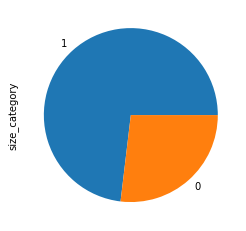

1    378
0    139
Name: size_category, dtype: int64


In [10]:
df['size_category'].value_counts().plot.pie()
plt.show()
print(df['size_category'].value_counts())

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>],
       [<AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>,
        <AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>],
       [<AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>,
        <AxesSubplot:title={'center':'monthdec'}>,
        <AxesSubplot:title={'center':'monthfeb'}>],
       [<AxesSubplot:title={'cen

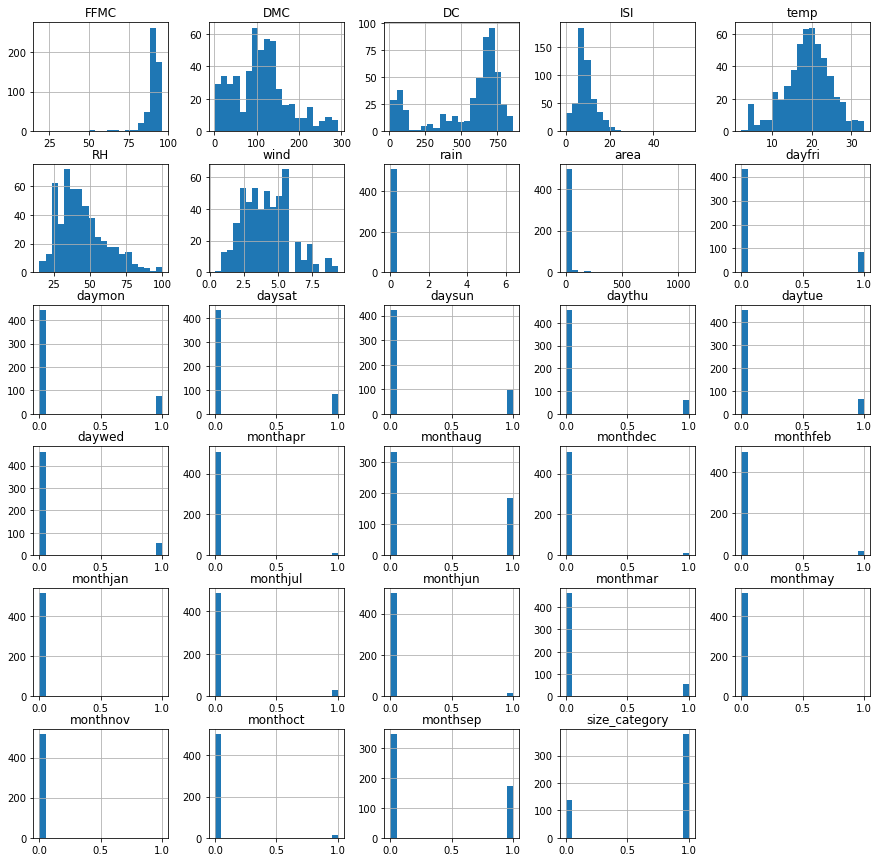

In [11]:
df.hist(figsize=(15,15), bins=20)

In [12]:
X = df.iloc[:,0:28]

In [13]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = df.iloc[:,28]

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [16]:
#Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [19]:
#Train the Support Vector Classifier

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()

In [22]:
model.fit(X_train,y_train)

SVC()

In [23]:
#predictions

In [24]:
predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[  3  43]
 [  0 110]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        46
           1       0.72      1.00      0.84       110

    accuracy                           0.72       156
   macro avg       0.86      0.53      0.48       156
weighted avg       0.80      0.72      0.63       156



# Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf','poly','linear'],'gamma':[100,50,10,0.5],'C':[10,0.1,15] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 15], 'gamma': [100, 50, 10, 0.5],
                          'kernel': ['rbf', 'poly', 'linear']}])

In [29]:
gsv.best_params_ , gsv.best_score_

({'C': 0.1, 'gamma': 100, 'kernel': 'linear'}, 0.986111111111111)

# Since we got linear model as best parameter we will fit the model using linear as parameter

In [30]:
clf = SVC(C= 0.1,kernel='linear',gamma= 100)
clf.fit(X_train , y_train)

SVC(C=0.1, gamma=100, kernel='linear')

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 97.43589743589743


array([[ 45,   1],
       [  3, 107]], dtype=int64)

In [32]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0])